In [3]:
import re
import numpy as np
import time
import os.path
import sys
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
from io import StringIO
#from Bio import SeqIO
#import pysam
from pandas.plotting import scatter_matrix
import warnings
import json
import numpy as np
import subprocess
from collections import OrderedDict
warnings.filterwarnings('ignore')


In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

## Box plots

In [138]:
PRJ='PRJNA901878'
BASE_PATH = f'/mnt/8TB_2/Data/Assembly/{PRJ}/'
PLOT_PATH=BASE_PATH+'general_plots/'

In [139]:

graft_df=pd.read_csv(f'{BASE_PATH}/general_plots/3_method_graft_host.csv')

In [140]:
graft_df.head(n=20)

,SRA,Sample,Sscrofa11.1,YNU_ManJav_2.0,M.javanica %,S.scrofa %,Host,Method
0,SRR22936419,PPeV-GX,37180600,116686,0.313000,99.687146,Manis javanica,ConcatRef
1,SRR22936420,HKU4-GX,130445860,360629,0.276000,99.724303,Manis javanica,ConcatRef
2,SRR22936421,P79-9,473838,79115536,99.405000,0.595353,Manis javanica,ConcatRef
3,SRR22936422,P70-9,399163,80895447,99.509000,0.491008,Manis javanica,ConcatRef
4,SRR22936541,M5-9,314506,81167913,99.614000,0.385980,Manis javanica,ConcatRef
5,SRR22936544,P44-9,543296,77834081,99.307000,0.693180,Manis javanica,ConcatRef
6,SRR22936770,FL16,57430494,42903,0.075000,99.925352,Sus scrofa,ConcatRef
7,SRR22936773,FL13,48627934,51227,0.105234,99.894766,Sus scrofa,ConcatRef
8,SRR22936419,PPeV-GX,35712880,25944,0.072593,99.927407,Manis javanica,Seal
9,SRR22936420,HKU4-GX,123758562,46356,0.037443,99.962557,Manis javanica,Seal


In [141]:
graft_concat=graft_df.loc[graft_df['Method'] == 'ConcatRef']
graft_seal=graft_df.loc[graft_df['Method'] == 'Seal']
graft_XenofilteR=graft_df.loc[graft_df['Method'] == 'XenofilteR']

In [142]:
MARKER_SIZE=10
MARKER_ALPHA=0.6

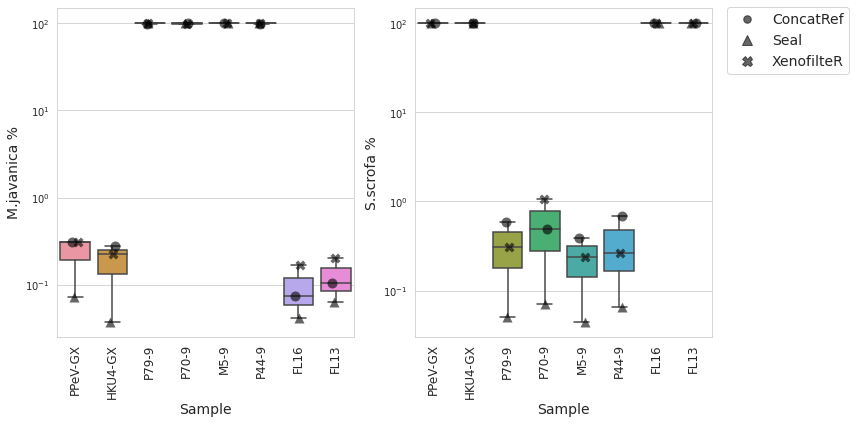

In [143]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))


sns.set_palette("RdBu")
sns.set_style("whitegrid")
sns.boxplot(data=graft_df, x='Sample', y='M.javanica %', ax=ax1)
chart=sns.stripplot(data=graft_concat, x='Sample', y='M.javanica %', color="k", alpha=MARKER_ALPHA, ax=ax1, s=MARKER_SIZE)
chart=sns.stripplot(data=graft_seal, x='Sample', y='M.javanica %', color="k", alpha=MARKER_ALPHA, ax=ax1, marker="^", s=MARKER_SIZE)
chart=sns.stripplot(data=graft_XenofilteR, x='Sample', y='M.javanica %', color="k", alpha=MARKER_ALPHA, ax=ax1, marker="X", s=MARKER_SIZE)
chart.set_xlabel('Sample', fontdict={'size': 14})
chart.set_ylabel('M.javanica %', fontdict={'size': 14})
labels1=ax1.get_xticklabels()
ax1.set_xticklabels(labels1, rotation=90, fontsize=12)
ax1.set_yscale('log')

sns.boxplot(data=graft_df, x='Sample', y='S.scrofa %', ax=ax2)
chart2=sns.stripplot(data=graft_concat, x='Sample', y='S.scrofa %', color="k", alpha=MARKER_ALPHA, ax=ax2, s=MARKER_SIZE)
chart2=sns.stripplot(data=graft_seal, x='Sample', y='S.scrofa %', color="k", alpha=MARKER_ALPHA, ax=ax2, marker="^", s=MARKER_SIZE)
chart2=sns.stripplot(data=graft_XenofilteR, x='Sample', y='S.scrofa %', color="k", alpha=MARKER_ALPHA, ax=ax2, marker="X", s=MARKER_SIZE)
chart2.set_xlabel('Sample', fontdict={'size': 14})
chart2.set_ylabel('S.scrofa %', fontdict={'size': 14})
labels2=ax2.get_xticklabels()
ax2.set_xticklabels(labels2, rotation=90, fontsize=12)
ax2.set_yscale('log')

plt_labels=['ConcatRef', 'Seal', 'XenofilteR']
handles, labels = ax2.get_legend_handles_labels()
dot = mlines.Line2D([], [], color='k', marker='.',
                          markersize=15, label='ConcatRef', alpha=MARKER_ALPHA, linewidth=0.001)
tri = mlines.Line2D([], [], color='k', marker='^',
                          markersize=10, label='Seal', alpha=MARKER_ALPHA, linewidth=0.001)
cross = mlines.Line2D([], [], color='k', marker='X',
                          markersize=10, label='XenofilteR', alpha=MARKER_ALPHA, linewidth=0.001)
ax2.legend(handles=[dot, tri, cross], loc=(1.05, 0.8), fontsize=14)

#plt.legend()
plt.tight_layout()
plt.savefig(PLOT_PATH+'3_method_graft_host_box_combined.png', dpi=300)
plt.show()

#### Contigs

De novo assembled contigs were filtered to include only those >=300nt, then aligned using 3 independent methods to Manis javanica and Sus scrofa genomes

In [14]:
PRJ='PRJNA901878'
BASE_PATH = f'/mnt/8TB_2/Data/Assembly/{PRJ}/'
PLOT_PATH=BASE_PATH+'general_plots/'

In [15]:

graft_df=pd.read_csv(f'{BASE_PATH}/general_plots/3_method_graft_host_contigs.csv')

In [16]:
graft_df.head(n=20)

,SRA,Sample,Total,Sscrofa11.1,YNU_ManJav_2.0,M.javanica %,S.scrofa %,Host (as specified),Method
0,SRR22936419,PPeV-GX,57376,56978,398,0.693670,99.306330,Sus scrofa,XenofilteR
1,SRR22936420,HKU4-GX,116866,116331,535,0.457789,99.542211,Sus scrofa,XenofilteR
2,SRR22936421,P79-9,88309,531,87778,99.398702,0.601298,Manis javanica,XenofilteR
3,SRR22936422,P70-9,140347,684,139663,99.512637,0.487363,Manis javanica,XenofilteR
4,SRR22936541,M5-9,140153,692,139461,99.506254,0.493746,Manis javanica,XenofilteR
5,SRR22936544,P44-9,140773,730,140043,99.481435,0.518565,Manis javanica,XenofilteR
6,SRR22936770,FL16,161547,160844,703,0.435167,99.564833,Sus scrofa,XenofilteR
7,SRR22936773,FL13,112693,112087,606,0.537744,99.462256,Sus scrofa,XenofilteR
8,SRR22936419,PPeV-GX,287049,286359,690,0.240000,99.759623,Manis javanica,ConcatRef
9,SRR22936420,HKU4-GX,478219,477471,748,0.156000,99.843586,Manis javanica,ConcatRef


In [17]:
graft_concat=graft_df.loc[graft_df['Method'] == 'ConcatRef']
graft_seal=graft_df.loc[graft_df['Method'] == 'Seal']
graft_XenofilteR=graft_df.loc[graft_df['Method'] == 'XenofilteR']

In [18]:
MARKER_SIZE=10
MARKER_ALPHA=0.6

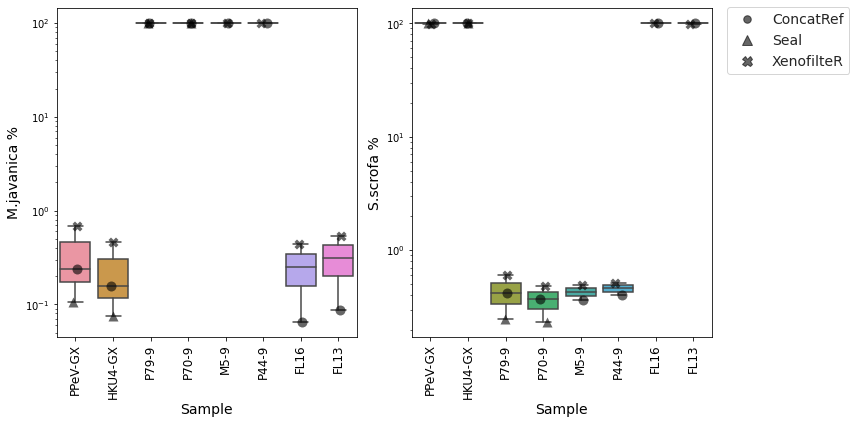

In [19]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))


sns.set_palette("RdBu")
sns.set_style("whitegrid")
sns.boxplot(data=graft_df, x='Sample', y='M.javanica %', ax=ax1)
chart=sns.stripplot(data=graft_concat, x='Sample', y='M.javanica %', color="k", alpha=MARKER_ALPHA, ax=ax1, s=MARKER_SIZE)
chart=sns.stripplot(data=graft_seal, x='Sample', y='M.javanica %', color="k", alpha=MARKER_ALPHA, ax=ax1, marker="^", s=MARKER_SIZE)
chart=sns.stripplot(data=graft_XenofilteR, x='Sample', y='M.javanica %', color="k", alpha=MARKER_ALPHA, ax=ax1, marker="X", s=MARKER_SIZE)
chart.set_xlabel('Sample', fontdict={'size': 14})
chart.set_ylabel('M.javanica %', fontdict={'size': 14})
labels1=ax1.get_xticklabels()
ax1.set_xticklabels(labels1, rotation=90, fontsize=12)
ax1.set_yscale('log')

sns.boxplot(data=graft_df, x='Sample', y='S.scrofa %', ax=ax2)
chart2=sns.stripplot(data=graft_concat, x='Sample', y='S.scrofa %', color="k", alpha=MARKER_ALPHA, ax=ax2, s=MARKER_SIZE)
chart2=sns.stripplot(data=graft_seal, x='Sample', y='S.scrofa %', color="k", alpha=MARKER_ALPHA, ax=ax2, marker="^", s=MARKER_SIZE)
chart2=sns.stripplot(data=graft_XenofilteR, x='Sample', y='S.scrofa %', color="k", alpha=MARKER_ALPHA, ax=ax2, marker="X", s=MARKER_SIZE)
chart2.set_xlabel('Sample', fontdict={'size': 14})
chart2.set_ylabel('S.scrofa %', fontdict={'size': 14})
labels2=ax2.get_xticklabels()
ax2.set_xticklabels(labels2, rotation=90, fontsize=12)
ax2.set_yscale('log')

plt_labels=['ConcatRef', 'Seal', 'XenofilteR']
handles, labels = ax2.get_legend_handles_labels()
dot = mlines.Line2D([], [], color='k', marker='.',
                          markersize=15, label='ConcatRef', alpha=MARKER_ALPHA, linewidth=0.001)
tri = mlines.Line2D([], [], color='k', marker='^',
                          markersize=10, label='Seal', alpha=MARKER_ALPHA, linewidth=0.001)
cross = mlines.Line2D([], [], color='k', marker='X',
                          markersize=10, label='XenofilteR', alpha=MARKER_ALPHA, linewidth=0.001)
ax2.legend(handles=[dot, tri, cross], loc=(1.05, 0.8), fontsize=14)

#plt.legend()
plt.tight_layout()
plt.savefig(PLOT_PATH+'3_method_graft_host_contigs_box_combined.png', dpi=300)
plt.show()

### "Bamboo Rat" sample

In [138]:
PRJ='PRJNA901878'
BASE_PATH = f'/mnt/8TB_2/Data/Assembly/{PRJ}/'
PLOT_PATH=BASE_PATH+'general_plots/'

In [139]:

graft_df=pd.read_csv(f'{BASE_PATH}/general_plots/3_method_graft_host.csv')

In [140]:
graft_df.head(n=20)

,SRA,Sample,Sscrofa11.1,YNU_ManJav_2.0,M.javanica %,S.scrofa %,Host,Method
0,SRR22936419,PPeV-GX,37180600,116686,0.313000,99.687146,Manis javanica,ConcatRef
1,SRR22936420,HKU4-GX,130445860,360629,0.276000,99.724303,Manis javanica,ConcatRef
2,SRR22936421,P79-9,473838,79115536,99.405000,0.595353,Manis javanica,ConcatRef
3,SRR22936422,P70-9,399163,80895447,99.509000,0.491008,Manis javanica,ConcatRef
4,SRR22936541,M5-9,314506,81167913,99.614000,0.385980,Manis javanica,ConcatRef
5,SRR22936544,P44-9,543296,77834081,99.307000,0.693180,Manis javanica,ConcatRef
6,SRR22936770,FL16,57430494,42903,0.075000,99.925352,Sus scrofa,ConcatRef
7,SRR22936773,FL13,48627934,51227,0.105234,99.894766,Sus scrofa,ConcatRef
8,SRR22936419,PPeV-GX,35712880,25944,0.072593,99.927407,Manis javanica,Seal
9,SRR22936420,HKU4-GX,123758562,46356,0.037443,99.962557,Manis javanica,Seal


In [141]:
graft_concat=graft_df.loc[graft_df['Method'] == 'ConcatRef']
graft_seal=graft_df.loc[graft_df['Method'] == 'Seal']
graft_XenofilteR=graft_df.loc[graft_df['Method'] == 'XenofilteR']

In [142]:
MARKER_SIZE=10
MARKER_ALPHA=0.6

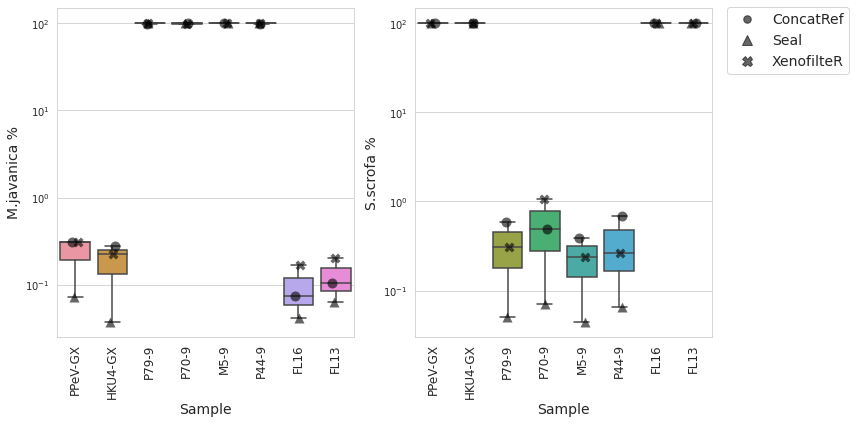

In [143]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))


sns.set_palette("RdBu")
sns.set_style("whitegrid")
sns.boxplot(data=graft_df, x='Sample', y='M.javanica %', ax=ax1)
chart=sns.stripplot(data=graft_concat, x='Sample', y='M.javanica %', color="k", alpha=MARKER_ALPHA, ax=ax1, s=MARKER_SIZE)
chart=sns.stripplot(data=graft_seal, x='Sample', y='M.javanica %', color="k", alpha=MARKER_ALPHA, ax=ax1, marker="^", s=MARKER_SIZE)
chart=sns.stripplot(data=graft_XenofilteR, x='Sample', y='M.javanica %', color="k", alpha=MARKER_ALPHA, ax=ax1, marker="X", s=MARKER_SIZE)
chart.set_xlabel('Sample', fontdict={'size': 14})
chart.set_ylabel('M.javanica %', fontdict={'size': 14})
labels1=ax1.get_xticklabels()
ax1.set_xticklabels(labels1, rotation=90, fontsize=12)
ax1.set_yscale('log')

sns.boxplot(data=graft_df, x='Sample', y='S.scrofa %', ax=ax2)
chart2=sns.stripplot(data=graft_concat, x='Sample', y='S.scrofa %', color="k", alpha=MARKER_ALPHA, ax=ax2, s=MARKER_SIZE)
chart2=sns.stripplot(data=graft_seal, x='Sample', y='S.scrofa %', color="k", alpha=MARKER_ALPHA, ax=ax2, marker="^", s=MARKER_SIZE)
chart2=sns.stripplot(data=graft_XenofilteR, x='Sample', y='S.scrofa %', color="k", alpha=MARKER_ALPHA, ax=ax2, marker="X", s=MARKER_SIZE)
chart2.set_xlabel('Sample', fontdict={'size': 14})
chart2.set_ylabel('S.scrofa %', fontdict={'size': 14})
labels2=ax2.get_xticklabels()
ax2.set_xticklabels(labels2, rotation=90, fontsize=12)
ax2.set_yscale('log')

plt_labels=['ConcatRef', 'Seal', 'XenofilteR']
handles, labels = ax2.get_legend_handles_labels()
dot = mlines.Line2D([], [], color='k', marker='.',
                          markersize=15, label='ConcatRef', alpha=MARKER_ALPHA, linewidth=0.001)
tri = mlines.Line2D([], [], color='k', marker='^',
                          markersize=10, label='Seal', alpha=MARKER_ALPHA, linewidth=0.001)
cross = mlines.Line2D([], [], color='k', marker='X',
                          markersize=10, label='XenofilteR', alpha=MARKER_ALPHA, linewidth=0.001)
ax2.legend(handles=[dot, tri, cross], loc=(1.05, 0.8), fontsize=14)

#plt.legend()
plt.tight_layout()
plt.savefig(PLOT_PATH+'3_method_graft_host_box_combined.png', dpi=300)
plt.show()

#### Contigs

De novo assembled contigs were filtered to include only those >=300nt, then aligned using 3 independent methods to Manis javanica and Sus scrofa genomes

In [14]:
PRJ='PRJNA901878'
BASE_PATH = f'/mnt/8TB_2/Data/Assembly/{PRJ}/'
PLOT_PATH=BASE_PATH+'general_plots/'

In [15]:

graft_df=pd.read_csv(f'{BASE_PATH}/general_plots/3_method_graft_host_contigs.csv')

In [16]:
graft_df.head(n=20)

,SRA,Sample,Total,Sscrofa11.1,YNU_ManJav_2.0,M.javanica %,S.scrofa %,Host (as specified),Method
0,SRR22936419,PPeV-GX,57376,56978,398,0.693670,99.306330,Sus scrofa,XenofilteR
1,SRR22936420,HKU4-GX,116866,116331,535,0.457789,99.542211,Sus scrofa,XenofilteR
2,SRR22936421,P79-9,88309,531,87778,99.398702,0.601298,Manis javanica,XenofilteR
3,SRR22936422,P70-9,140347,684,139663,99.512637,0.487363,Manis javanica,XenofilteR
4,SRR22936541,M5-9,140153,692,139461,99.506254,0.493746,Manis javanica,XenofilteR
5,SRR22936544,P44-9,140773,730,140043,99.481435,0.518565,Manis javanica,XenofilteR
6,SRR22936770,FL16,161547,160844,703,0.435167,99.564833,Sus scrofa,XenofilteR
7,SRR22936773,FL13,112693,112087,606,0.537744,99.462256,Sus scrofa,XenofilteR
8,SRR22936419,PPeV-GX,287049,286359,690,0.240000,99.759623,Manis javanica,ConcatRef
9,SRR22936420,HKU4-GX,478219,477471,748,0.156000,99.843586,Manis javanica,ConcatRef


In [17]:
graft_concat=graft_df.loc[graft_df['Method'] == 'ConcatRef']
graft_seal=graft_df.loc[graft_df['Method'] == 'Seal']
graft_XenofilteR=graft_df.loc[graft_df['Method'] == 'XenofilteR']

In [18]:
MARKER_SIZE=10
MARKER_ALPHA=0.6

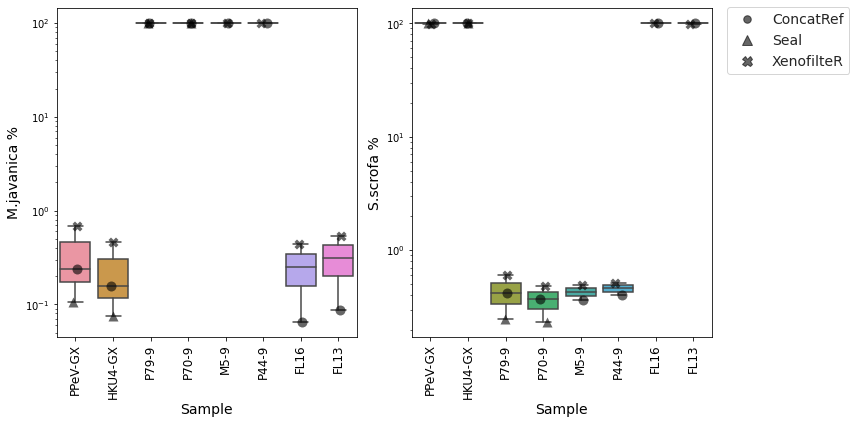

In [19]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))


sns.set_palette("RdBu")
sns.set_style("whitegrid")
sns.boxplot(data=graft_df, x='Sample', y='M.javanica %', ax=ax1)
chart=sns.stripplot(data=graft_concat, x='Sample', y='M.javanica %', color="k", alpha=MARKER_ALPHA, ax=ax1, s=MARKER_SIZE)
chart=sns.stripplot(data=graft_seal, x='Sample', y='M.javanica %', color="k", alpha=MARKER_ALPHA, ax=ax1, marker="^", s=MARKER_SIZE)
chart=sns.stripplot(data=graft_XenofilteR, x='Sample', y='M.javanica %', color="k", alpha=MARKER_ALPHA, ax=ax1, marker="X", s=MARKER_SIZE)
chart.set_xlabel('Sample', fontdict={'size': 14})
chart.set_ylabel('M.javanica %', fontdict={'size': 14})
labels1=ax1.get_xticklabels()
ax1.set_xticklabels(labels1, rotation=90, fontsize=12)
ax1.set_yscale('log')

sns.boxplot(data=graft_df, x='Sample', y='S.scrofa %', ax=ax2)
chart2=sns.stripplot(data=graft_concat, x='Sample', y='S.scrofa %', color="k", alpha=MARKER_ALPHA, ax=ax2, s=MARKER_SIZE)
chart2=sns.stripplot(data=graft_seal, x='Sample', y='S.scrofa %', color="k", alpha=MARKER_ALPHA, ax=ax2, marker="^", s=MARKER_SIZE)
chart2=sns.stripplot(data=graft_XenofilteR, x='Sample', y='S.scrofa %', color="k", alpha=MARKER_ALPHA, ax=ax2, marker="X", s=MARKER_SIZE)
chart2.set_xlabel('Sample', fontdict={'size': 14})
chart2.set_ylabel('S.scrofa %', fontdict={'size': 14})
labels2=ax2.get_xticklabels()
ax2.set_xticklabels(labels2, rotation=90, fontsize=12)
ax2.set_yscale('log')

plt_labels=['ConcatRef', 'Seal', 'XenofilteR']
handles, labels = ax2.get_legend_handles_labels()
dot = mlines.Line2D([], [], color='k', marker='.',
                          markersize=15, label='ConcatRef', alpha=MARKER_ALPHA, linewidth=0.001)
tri = mlines.Line2D([], [], color='k', marker='^',
                          markersize=10, label='Seal', alpha=MARKER_ALPHA, linewidth=0.001)
cross = mlines.Line2D([], [], color='k', marker='X',
                          markersize=10, label='XenofilteR', alpha=MARKER_ALPHA, linewidth=0.001)
ax2.legend(handles=[dot, tri, cross], loc=(1.05, 0.8), fontsize=14)

#plt.legend()
plt.tight_layout()
plt.savefig(PLOT_PATH+'3_method_graft_host_contigs_box_combined.png', dpi=300)
plt.show()

## Bamboo Rat

Sample GX19-89 (SRR22936497) in BioProject PRJNA901878 was identified as having reads dominantly mapping to the Sus scrofa mitochondrial genome and very little Rhizomys pruinosus mitochondrial genome.

Here Full genome alignmnent counts are plotted.

The dataset is clearly sourced from a Sus scrofa sample

In [5]:
PRJ='PRJNA901878'
BASE_PATH = f'/mnt/8TB_2/Data/Assembly/{PRJ}/'
PLOT_PATH=BASE_PATH+'general_plots/'

In [6]:
graft_df=pd.read_csv(f'{BASE_PATH}/general_plots/3_method_rhipru-sus.csv')

In [7]:
graft_df.rename(columns=lambda x: x.strip())
graft_df['Method'] = graft_df['Method'].str.strip()

In [8]:
graft_concat=graft_df.loc[graft_df['Method'] == 'ConcatRef']
graft_seal=graft_df.loc[graft_df['Method'] == 'Seal']
graft_XenofilteR=graft_df.loc[graft_df['Method'] == 'XenofilteR']

In [9]:
contig_df=pd.read_csv(f'{BASE_PATH}/general_plots/3_method_rhipru-sus_contigs.csv')

In [10]:
contig_concat=contig_df.loc[contig_df['Method'] == 'ConcatRef']
contig_seal=contig_df.loc[contig_df['Method'] == 'Seal']
contig_XenofilteR=contig_df.loc[contig_df['Method'] == 'XenofilteR']

In [11]:
MARKER_SIZE=10
MARKER_ALPHA=0.6

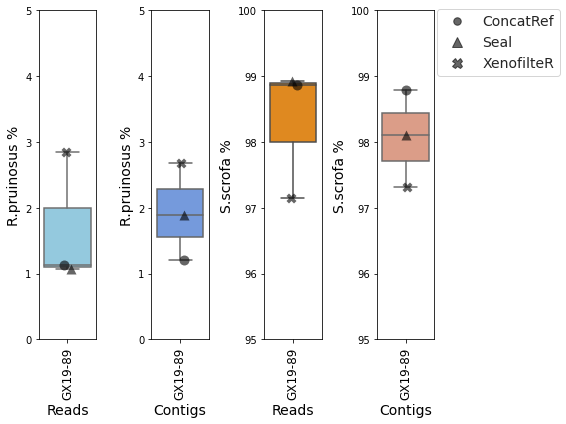

In [12]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(8,6))

sns.set_style("whitegrid")
sns.boxplot(data=graft_df, x='Sample', y='R.pruinosus %', ax=ax1, color='skyblue')
chart=sns.stripplot(data=graft_concat, x='Sample', y='R.pruinosus %', color="k", alpha=MARKER_ALPHA, ax=ax1, s=MARKER_SIZE)
chart=sns.stripplot(data=graft_seal, x='Sample', y='R.pruinosus %', color="k", alpha=MARKER_ALPHA, ax=ax1, marker="^", s=MARKER_SIZE)
chart=sns.stripplot(data=graft_XenofilteR, x='Sample', y='R.pruinosus %', color="k", alpha=MARKER_ALPHA, ax=ax1, marker="X", s=MARKER_SIZE)
chart.set_xlabel('Reads', fontdict={'size': 14})
chart.set_ylabel('R.pruinosus %', fontdict={'size': 14})
labels1=ax1.get_xticklabels()
ax1.set_xticklabels(labels1, rotation=90, fontsize=12)
ax1.set_ylim(0, 5)
#ax1.set_yscale('log')

#contigs
sns.boxplot(data=contig_df, x='Sample', y='R.pruinosus %', ax=ax2, color='cornflowerblue')
chart2=sns.stripplot(data=contig_concat, x='Sample', y='R.pruinosus %', color="k", alpha=MARKER_ALPHA, ax=ax2, s=MARKER_SIZE)
chart2=sns.stripplot(data=contig_seal, x='Sample', y='R.pruinosus %', color="k", alpha=MARKER_ALPHA, ax=ax2, marker="^", s=MARKER_SIZE)
chart2=sns.stripplot(data=contig_XenofilteR, x='Sample', y='R.pruinosus %', color="k", alpha=MARKER_ALPHA, ax=ax2, marker="X", s=MARKER_SIZE)
chart2.set_xlabel('Contigs', fontdict={'size': 14})
chart2.set_ylabel('R.pruinosus %', fontdict={'size': 14})
labels2=ax2.get_xticklabels()
ax2.set_xticklabels(labels2, rotation=90, fontsize=12)
ax2.set_ylim(0, 5)
#ax3.set_yscale('log')

sns.boxplot(data=graft_df, x='Sample', y='S.scrofa %', ax=ax3, color='darkorange')
chart3=sns.stripplot(data=graft_concat, x='Sample', y='S.scrofa %', color="k", alpha=MARKER_ALPHA, ax=ax3, s=MARKER_SIZE)
chart3=sns.stripplot(data=graft_seal, x='Sample', y='S.scrofa %', color="k", alpha=MARKER_ALPHA, ax=ax3, marker="^", s=MARKER_SIZE)
chart3=sns.stripplot(data=graft_XenofilteR, x='Sample', y='S.scrofa %', color="k", alpha=MARKER_ALPHA, ax=ax3, marker="X", s=MARKER_SIZE)
chart3.set_xlabel('Reads', fontdict={'size': 14})
chart3.set_ylabel('S.scrofa %', fontdict={'size': 14})
labels3=ax3.get_xticklabels()
ax3.set_xticklabels(labels3, rotation=90, fontsize=12)
ax3.set_ylim(95, 100)
#ax2.set_yscale('log')

sns.boxplot(data=contig_df, x='Sample', y='S.scrofa %', ax=ax4, color='darksalmon')
chart4=sns.stripplot(data=contig_concat, x='Sample', y='S.scrofa %', color="k", alpha=MARKER_ALPHA, ax=ax4, s=MARKER_SIZE)
chart4=sns.stripplot(data=contig_seal, x='Sample', y='S.scrofa %', color="k", alpha=MARKER_ALPHA, ax=ax4, marker="^", s=MARKER_SIZE)
chart4=sns.stripplot(data=contig_XenofilteR, x='Sample', y='S.scrofa %', color="k", alpha=MARKER_ALPHA, ax=ax4, marker="X", s=MARKER_SIZE)
chart4.set_xlabel('Contigs', fontdict={'size': 14})
chart4.set_ylabel('S.scrofa %', fontdict={'size': 14})
labels4=ax4.get_xticklabels()
ax4.set_xticklabels(labels4, rotation=90, fontsize=12)
ax4.set_ylim(95, 100)
#ax4.set_yscale('log')

plt_labels=['ConcatRef', 'Seal', 'XenofilteR']
handles, labels = ax4.get_legend_handles_labels()
dot = mlines.Line2D([], [], color='k', marker='.',
                          markersize=15, label='ConcatRef', alpha=MARKER_ALPHA, linewidth=0.001)
tri = mlines.Line2D([], [], color='k', marker='^',
                          markersize=10, label='Seal', alpha=MARKER_ALPHA, linewidth=0.001)
cross = mlines.Line2D([], [], color='k', marker='X',
                          markersize=10, label='XenofilteR', alpha=MARKER_ALPHA, linewidth=0.001)
ax4.legend(handles=[dot, tri, cross], loc=(1.05, 0.8), fontsize=14)

#plt.legend()
plt.tight_layout()
#plt.savefig(PLOT_PATH+'3_method_rhipru-sus_reads_combined.png', dpi=300)
plt.show()
